# Plot generation to compare different models

In [6]:
root_dir = '/scratch/cjh9fw/Rivanna/2024/repos/EgoExoEMS/Benchmarks/ActionRecognition/MTRSAP/results'

segmentation_results_csv = './final_results_segmentation.csv'

## Segmentation Results

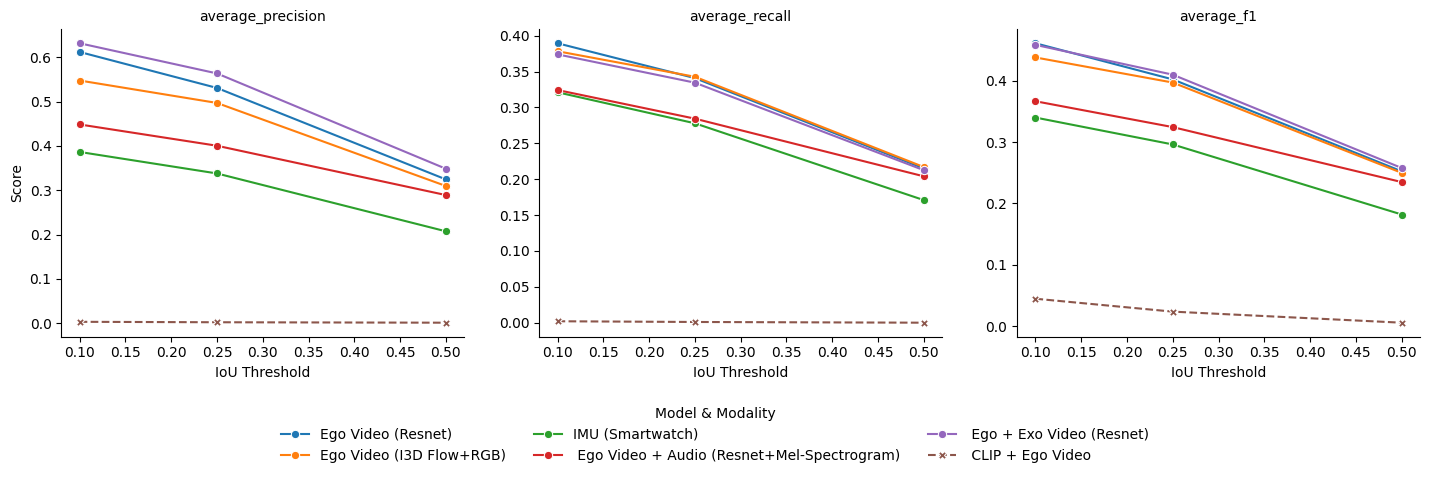

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV (replace 'your_file.csv' with the path to your CSV file)
df = pd.read_csv(segmentation_results_csv)

# Melt DataFrame for plotting
df_melted = df.melt(
    id_vars=['model', 'modality'],  # Include 'model' here to differentiate line styles
    value_vars=[
        'average_precision@0.1', 'average_precision@0.25', 'average_precision@0.5',
        'average_recall@0.1', 'average_recall@0.25', 'average_recall@0.5',
        'average_f1@0.1', 'average_f1@0.25', 'average_f1@0.5'
    ],
    var_name='Metric_Threshold',
    value_name='Score'
)

# Split 'Metric_Threshold' into 'Metric' and 'IoU Threshold' columns
df_melted[['Metric', 'IoU Threshold']] = df_melted['Metric_Threshold'].str.split('@', expand=True)
df_melted['IoU Threshold'] = df_melted['IoU Threshold'].astype(float)  # Convert threshold to float

# Set up the FacetGrid for three metrics, with dashed lines for different models
g = sns.FacetGrid(df_melted, col='Metric', hue='modality', sharey=False, height=4, aspect=1.2, legend_out=False)

# Define a custom function to map the line style based on the model
def lineplot_with_style(data, **kwargs):
    line_style = '-' if data['model'].iloc[0] == 'MTRSAP' else '--'  # Change condition as needed for different models
    marker_style = 'o' if data['model'].iloc[0] == 'MTRSAP' else 'X'  # Change condition as needed for different models
    sns.lineplot(data=data, x='IoU Threshold', y='Score', marker=marker_style, linestyle=line_style, **kwargs)

# Apply the custom line plotting function
g.map_dataframe(lineplot_with_style)

# Remove the automatic legend
g.add_legend = lambda *args, **kwargs: None

# Create a single legend manually
handles, labels = g.axes.flat[0].get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, title='Model & Modality', frameon=False)

# Set labels and titles
g.set_axis_labels('IoU Threshold', 'Score')
g.set_titles("{col_name}")

# Show and save the plot
plt.show()
g.savefig('./plots/segmentation_results.png', bbox_inches='tight')
